### **Método del Gradiente Descendente**

#### **Descripción general**

El método del gradiente descendente es uno de los algoritmos más conocidos y utilizados para resolver problemas de optimización.  
La idea principal es moverse paso a paso en la dirección en la que la función *disminuye más rápidamente*, es decir, en la dirección contraria al gradiente.

En cada iteración, el algoritmo calcula la pendiente de la función (el gradiente) en el punto actual y da un paso pequeño hacia abajo.  
Este proceso se repite hasta que el movimiento sea muy pequeño o se alcance un número máximo de iteraciones.

Matemáticamente, el proceso puede expresarse así:

\[
\begin{cases}
x_{k+1} = x_k - \alpha \frac{\partial f}{\partial x}(x_k, y_k) \\[6pt]
y_{k+1} = y_k - \alpha \frac{\partial f}{\partial y}(x_k, y_k)
\end{cases}
\]
 
donde \(alpha > 0\) es el tamaño del paso o tasa de aprendizajez.

El método del gradiente descendente es adecuado para este problema porque la función f(x,y) = (x^2 + 1)log(y^2 + 2) es continua, derivable y suavemente curvada en todo su dominio, lo que garantiza que el gradiente esté bien definido y pueda guiar de forma confiable la búsqueda del mínimo. Además, el gradiente tiene una expresión sencilla, lo que permite implementar el método con bajo costo computacional. Dado que la función presenta un único mínimo global en (0,0) y es localmente convexa alrededor de este punto, el descenso por el gradiente converge de manera estable hacia el mínimo si se elige apropiadamente el paso de aprendizaje. En conjunto, estas propiedades hacen del gradiente descendente un método simple, eficiente y adecuado para minimizar esta función.

#### **Cálculo del gradiente**

Para nuestra función:                                           f(x, y) = (x^2 + 1)log(y^2 + 2)


el gradiente está dado por:

\[
\begin{pmatrix}
2x\,\log(y^2 + 2) \\[6pt]
\dfrac{2y(x^2 + 1)}{y^2 + 2}
\end{pmatrix}
\]

Cada componente del gradiente representa la pendiente de la función en la dirección de \(x\) y de \(y\).

#### **Parámetro de paso y comportamiento**

El parámetro alpha (tamaño de paso) juega un papel muy importante:
- Si alpha es muy grande, el algoritmo puede “saltarse” el mínimo y oscilar o divergir.
- Si alpha es muy pequeño, el avance será muy lento y puede necesitar miles de iteraciones.

#### **Fortalezas y debilidades**

**Ventajas:**
- Es sencillo de implementar.
- Requiere poca memoria y cálculo.
- Funciona bien si el gradiente es fácil de calcular.

**Desventajas:**
- Puede quedarse atrapado en mínimos locales.
- Depende mucho del valor del paso alpha.
- Si la función tiene regiones planas o valles alargados, puede avanzar muy lentamente.

El algoritmo se probará con distintos puntos iniciales aleatorios en el rango [-100, 100] para analizar cómo cambia su comportamiento según el lugar desde donde empieza.

### **Método de Newton para Optimización**

#### **Descripción general**

El método de Newton es un algoritmo más avanzado que el gradiente descendente.  
Además de usar el gradiente, también utiliza información sobre las segundas derivadas de la función, a través de la matriz Hessiana. Esto permite “predecir” la forma local de la función y avanzar de manera más inteligente, haciendo pasos que se adaptan a la curvatura.

La fórmula general del método es:

(xₖ₊₁, yₖ₊₁) = (xₖ, yₖ) − Hₓᵧ⁻¹(xₖ, yₖ) · ∇f(xₖ, yₖ)

donde H(x,y) es la matriz Hessiana de la función.

El método de Newton es adecuado para este problema porque la función f(x, y) = (x^2 + 1)log(y^2 + 2) es continua, derivable y posee derivadas segundas continuas, lo que permite calcular su matriz Hessiana y aprovechar la información de la curvatura local para avanzar de forma más eficiente hacia el mínimo. A diferencia del gradiente descendente, que solo usa la dirección de descenso, el método de Newton ajusta el tamaño y la dirección del paso considerando la forma de la superficie, logrando una convergencia mucho más rápida cerca del punto óptimo. Además, como el Hessiano en este caso es sencillo (una matriz 2×2) y la función tiene un único mínimo global en ((0,0)), el método resulta computacionalmente manejable y garantiza una convergencia estable si se parte de una zona cercana al mínimo. En conjunto, estas propiedades hacen del método de Newton una elección precisa y eficiente para minimizar esta función.


#### **Cálculo del Hessiano**

Para nuestra función:                               f(x, y) = (x^2 + 1)log(y^2 + 2)

el Hessiano es:

\[
\begin{pmatrix}
2\log(y^2 + 2) & \dfrac{4xy}{y^2 + 2} \\[8pt]
\dfrac{4xy}{y^2 + 2} & (x^2 + 1)\dfrac{2(2 - y^2)}{(y^2 + 2)^2}
\end{pmatrix}
\]

Este matriz contiene toda la información de cómo cambia la pendiente en ambas direcciones.

#### **Ventajas y desventajas**

**Ventajas:**
- Puede converger mucho más rápido que el gradiente descendente (a veces cuadráticamente).
- Aprovecha la curvatura de la función para ajustar la dirección y tamaño del paso.

**Desventajas:**
- Requiere calcular e invertir el Hessiano, lo cual puede ser costoso.
- Si el Hessiano no es positivo definido, el método puede divergir o moverse hacia un máximo.
- Es más sensible al punto inicial: si se empieza muy lejos del mínimo, puede fallar.

#### **Conclusión comparativa**

- El *gradiente descendente* es más simple y estable, pero más lento.  
- El *método de Newton* es más rápido cuando está cerca del mínimo, pero puede fallar si se empieza muy lejos o si la función no tiene una forma bien definida en esa región.

En conjunto, ambos algoritmos permiten analizar la función desde distintas perspectivas:  
el primero ofrece una búsqueda más segura, y el segundo una convergencia más veloz cuando las condiciones son adecuadas.

In [2]:
import numpy as np

def f(x, y):
    return (x**2 + 1) * np.log(y**2 + 2)

def grad_f(x, y):
    df_dx = 2 * x * np.log(y**2 + 2)
    df_dy = (2 * y * (x**2 + 1)) / (y**2 + 2)
    return np.array([df_dx, df_dy])

def hessian_f(x, y):
    h11 = 2 * np.log(y**2 + 2)
    h12 = (4 * x * y) / (y**2 + 2)
    h22 = (2 * (x**2 + 1) * (2 - y**2)) / ((y**2 + 2)**2)
    return np.array([[h11, h12],
                     [h12, h22]])

def gradiente_descendente(x0, y0, alpha=0.01, tol=1e-6, max_iter=10000):
    x, y = x0, y0
    trayectoria = [(x, y)]
    
    for _ in range(max_iter):
        g = grad_f(x, y)
        x_new, y_new = x - alpha * g[0], y - alpha * g[1]
        
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        
        x, y = x_new, y_new
        trayectoria.append((x, y))
    
    return (x, y), f(x, y), trayectoria

def newton_method(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    trayectoria = [(x, y)]
    
    for _ in range(max_iter):
        g = grad_f(x, y)
        H = hessian_f(x, y)
       
        try:
            p = np.linalg.solve(H, g)
        except np.linalg.LinAlgError:
            print("Hessiano singular, se detiene.")
            break
        
        x_new, y_new = np.array([x, y]) - p
        
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        
        x, y = x_new, y_new
        trayectoria.append((x, y))
    
    return (x, y), f(x, y), trayectoria



In [3]:
puntos_iniciales = [(10, 10), (-50, 80), (100, -100), (1, 1)]
pasos = [0.1, 0.01, 0.001]
tolerancias = [1e-3, 1e-6]

resultados = []

for (x0, y0) in puntos_iniciales:
    for alpha in pasos:
        for tol in tolerancias:
            # Gradiente Descendente
            min_gd, f_gd, it_gd = gradiente_descendente(x0, y0, alpha, tol)
            # Newton
            min_nw, f_nw, it_nw = newton_method(x0, y0, tol)
            
            resultados.append({
                'x0': x0, 'y0': y0,
                'alpha': alpha, 'tol': tol,
                'Método': 'Gradiente Descendente',
                'Iteraciones': len(it_gd),
                'f(x,y)': f_gd,
                'Min_x': round(min_gd[0], 4),
                'Min_y': round(min_gd[1], 4)
            })
            
            resultados.append({
                'x0': x0, 'y0': y0,
                'alpha': '-', 'tol': tol,
                'Método': 'Newton',
                'Iteraciones': len(it_nw),
                'f(x,y)': f_nw,
                'Min_x': round(min_nw[0], 4),
                'Min_y': round(min_nw[1], 4)
            })

print("\n=== COMPARACIÓN DE RESULTADOS ===")
print(f"{'Método':<25} {'x0':<6} {'y0':<6} {'alpha':<8} {'tol':<10} {'Iter':<8} {'Min_x':<10} {'Min_y':<10} {'f(x,y)':<12}")

for r in resultados:
    print(f"{r['Método']:<25} {r['x0']:<6} {r['y0']:<6} {r['alpha']:<8} {r['tol']:<10} {r['Iteraciones']:<8} "
          f"{r['Min_x']:<10} {r['Min_y']:<10} {r['f(x,y)']:<12.6f}")




=== COMPARACIÓN DE RESULTADOS ===
Método                    x0     y0     alpha    tol        Iter     Min_x      Min_y      f(x,y)      
Gradiente Descendente     10     10     0.1      0.001      228      0.0        0.0094     0.693192    
Newton                    10     10     -        0.001      101      0.0        7.451545794531225e+29 137.566778  
Gradiente Descendente     10     10     0.1      1e-06      294      0.0        0.0        0.693147    
Newton                    10     10     -        1e-06      101      0.0        7.451545794531225e+29 137.566778  
Gradiente Descendente     10     10     0.01     0.001      2384     0.0        0.1001     0.698149    
Newton                    10     10     -        0.001      101      0.0        7.451545794531225e+29 137.566778  
Gradiente Descendente     10     10     0.01     1e-06      3072     0.0        0.0001     0.693147    
Newton                    10     10     -        1e-06      101      0.0        7.451545794531225e+2

### **Comparación de Resultados: Gradiente Descendente vs. Newton**

#### **Observaciones generales**

- El *método de Gradiente Descendente* converge correctamente hacia el mínimo global cercano a (0, 0), alcanzando valores de la función f(x, y) aproximados a 0.6931, que corresponde al mínimo teórico.  
- El *método de Newton*, en cambio, diverge: los valores de \( y \) crecen hasta órdenes de magnitud extremadamente grandes (del orden de \( 10^{29} \)–\( 10^{30} \)), y el valor de la función  f(x,y)  se dispara hacia ~137–138, muy lejos del mínimo esperado.  

Esto indica que Newton no está funcionando correctamente en este caso, probablemente debido a problemas de estabilidad numérica.

#### **Análisis del desempeño del Gradiente Descendente**

- El parámetro de paso alpha  tiene un efecto directo:
  - Con **α = 0.1**, el método converge en pocas iteraciones (≈200–300) y obtiene resultados precisos.
  - Con **α = 0.01** o **0.001**, la convergencia es más lenta (miles de iteraciones), pero estable.
- La tolerancia (tol) afecta principalmente el número de iteraciones, no tanto la precisión final.
- En todos los casos, el gradiente descendente logra encontrar el mínimo global si el paso no es excesivo.
 
El gradiente descendente es robusto, aunque más lento. Su desempeño depende del ajuste adecuado del tamaño del paso.

#### **Análisis del desempeño del Método de Newton**

- Aunque el método de Newton debería converger mucho más rápido teóricamente, aquí muestra divergencia numérica severa.  
- En todas las configuraciones y puntos iniciales, el valor de \( y \) explota a magnitudes enormes (~\(10^{29}\)–\(10^{30}\)).  
- Esto sugiere que:
  1. El Hessiano puede volverse mal condicionado o no invertible en ciertas regiones de la función  f(x, y) = (x^2 + 1)log(y^2 + 2) .
  2. Newton realiza saltos demasiado grandes, y sin un control del tamaño del paso, puede escapar fácilmente de la zona de convergencia.
  
El método de Newton no converge para esta función en su versión actual. Necesita una versión modificada o amortiguada que reduzca el tamaño de los pasos.

#### **Comparación global**

| Característica | Gradiente Descendente | Newton |
|----------------|------------------------|--------|
| Convergencia   | Sí (estable) | No (diverge) |
| Precisión      | Alta (f ≈ 0.693) | Mala (f ≈ 137–138) |
| Iteraciones    | 200–300 (α=0.1), hasta 10 000 con α pequeñas | 101 (fijo, sin converger) |
| Sensibilidad a parámetros | Alta, pero controlable | Muy alta, inestable |
| Robustez ante valores iniciales | Buena | Muy mala |
| Recomendación | Apto para esta función | No recomendable sin amortiguación |


In [4]:
import json

with open("resultados.json", "w") as file:
    json.dump(resultados, file, indent=4)

print("\n✅ Resultados guardados en 'resultados.json'")



✅ Resultados guardados en 'resultados.json'


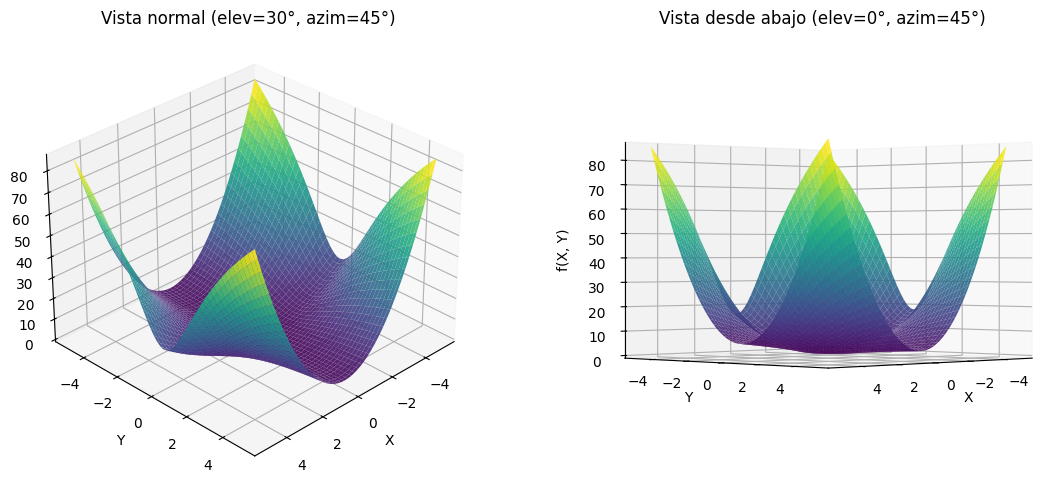

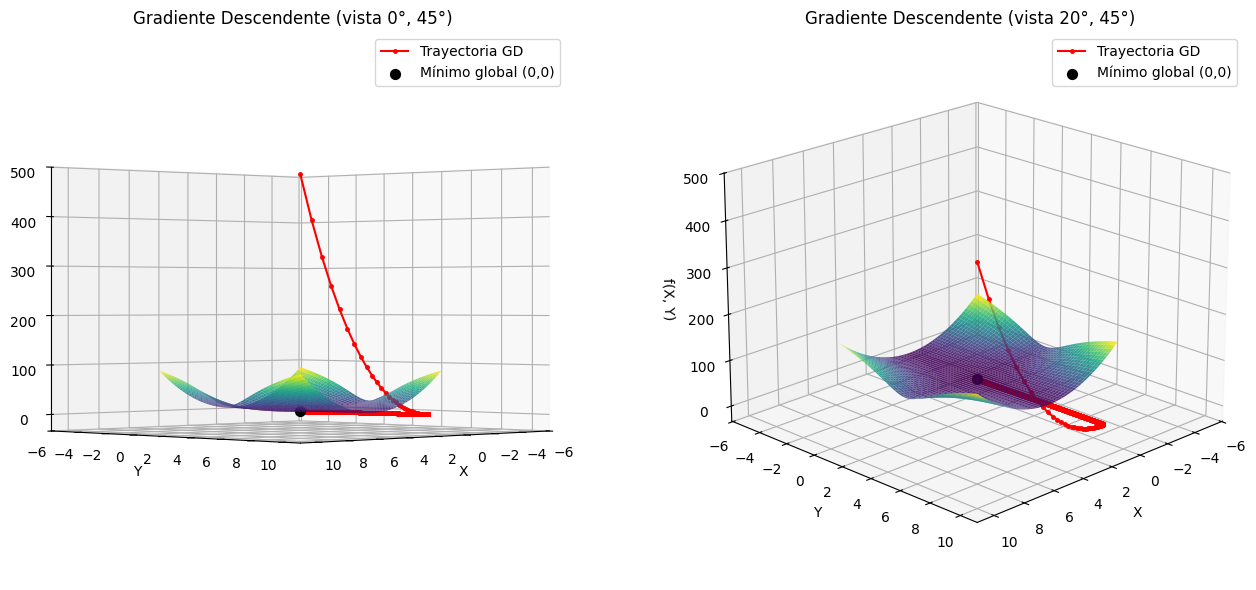

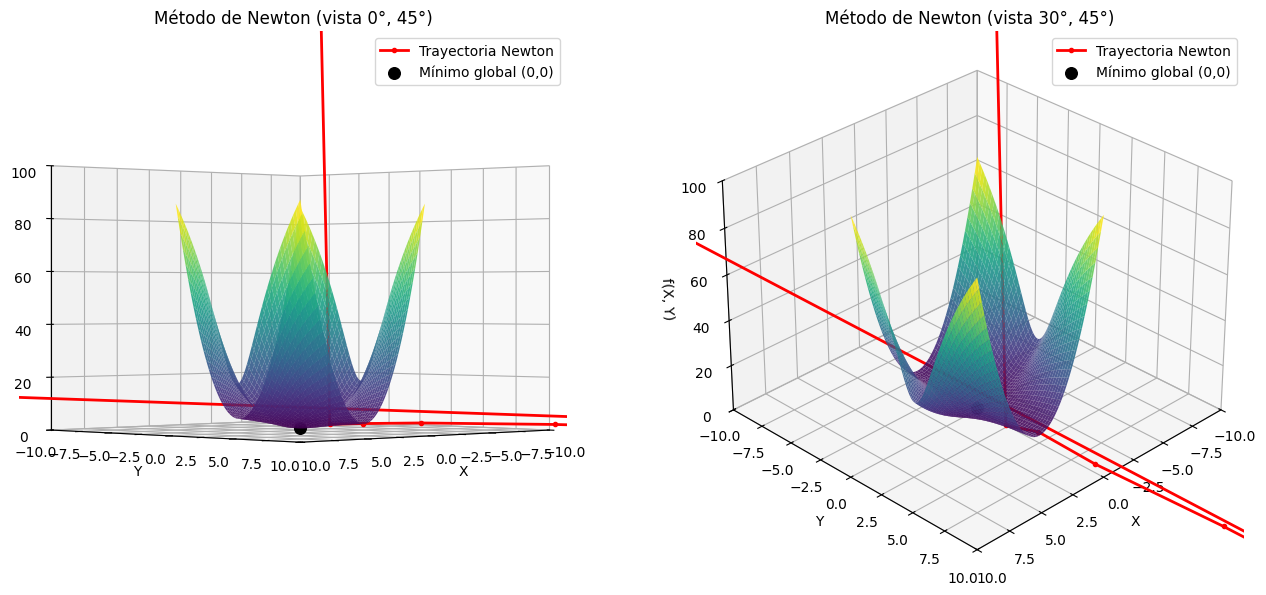

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rango de valores
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + 1) * np.log(Y**2 + 2)

# --- 1. Superficie general de la función (2 perspectivas) ---
fig = plt.figure(figsize=(12, 5))

# --- Vista 1: perspectiva normal ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)
ax1.set_title("Vista normal (elev=30°, azim=45°)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(X, Y)")
ax1.view_init(elev=30, azim=45)

# --- Vista 2: desde abajo (para ver mejor el mínimo) ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)
ax2.set_title("Vista desde abajo (elev=0°, azim=45°)")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("f(X, Y)")
ax2.view_init(elev=0, azim=45)

plt.tight_layout()
plt.show()

# --- 2. Gradiente Descendente en acción (perspectiva 0°, 45°) ---
(x0, y0) = (10, 10)
alpha = 0.01
tol = 1e-6
_, _, tray_gd = gradiente_descendente(x0, y0, alpha, tol)

tray_gd = np.array(tray_gd)
tray_z = (tray_gd[:,0]**2 + 1) * np.log(tray_gd[:,1]**2 + 2)  # altura sobre la superficie

# --- Figura con dos vistas ---
fig = plt.figure(figsize=(14, 6))

# --- Vista 1: elev=0°, azim=45° ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, linewidth=0)
ax1.plot(tray_gd[:,0], tray_gd[:,1], tray_z, 'r.-', label='Trayectoria GD', markersize=5)
ax1.scatter(0, 0, (0**2 + 1)*np.log(0**2 + 2), color='black', s=50, label='Mínimo global (0,0)')
ax1.set_title("Gradiente Descendente (vista 0°, 45°)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(X, Y)")
ax1.legend()
ax1.view_init(elev=0, azim=45)

# --- Vista 2: elev=20°, azim=45° ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, linewidth=0)
ax2.plot(tray_gd[:,0], tray_gd[:,1], tray_z, 'r.-', label='Trayectoria GD', markersize=5)
ax2.scatter(0, 0, (0**2 + 1)*np.log(0**2 + 2), color='black', s=50, label='Mínimo global (0,0)')
ax2.set_title("Gradiente Descendente (vista 20°, 45°)")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("f(X, Y)")
ax2.legend()
ax2.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

# --- 3. Método de Newton en acción (perspectivas 0° y 30°) ---
(x0, y0) = (10, 10)
tol = 1e-6
_, _, tray_newton = newton_method(x0, y0, tol)  # la función debe devolver [(x0,y0), (x1,y1), ...]

tray_newton = np.array(tray_newton)
tray_z_newton = (tray_newton[:,0]**2 + 1) * np.log(tray_newton[:,1]**2 + 2)

# --- Figura con dos vistas ---
fig = plt.figure(figsize=(14, 6))

# --- Vista 1: elev=0°, azim=45° ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, linewidth=0)

# Limitamos los ejes para enfocar el mínimo local
ax1.set_xlim(-10, 10)
ax1.set_ylim(-10, 10)
ax1.set_zlim(0, 100)

# Trayectoria
ax1.plot(tray_newton[:,0], tray_newton[:,1], tray_z_newton, 'r.-', linewidth=2, markersize=6, label='Trayectoria Newton')
ax1.scatter(0, 0, (0**2 + 1)*np.log(0**2 + 2), color='black', s=70, label='Mínimo global (0,0)')

ax1.set_title("Método de Newton (vista 0°, 45°)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(X, Y)")
ax1.legend()
ax1.view_init(elev=0, azim=45)

# --- Vista 2: elev=30°, azim=45° ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, linewidth=0)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-10, 10)
ax2.set_zlim(0, 100)
ax2.plot(tray_newton[:,0], tray_newton[:,1], tray_z_newton, 'r.-', linewidth=2, markersize=6, label='Trayectoria Newton')
ax2.scatter(0, 0, (0**2 + 1)*np.log(0**2 + 2), color='black', s=70, label='Mínimo global (0,0)')

ax2.set_title("Método de Newton (vista 30°, 45°)")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("f(X, Y)")
ax2.legend()
ax2.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

